In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

/Users/vishalkumar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
labels = ['SizeChart', 'NotSizeChart']
img_size = 640

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data('/Users/vishalkumar/Documents/Scripts/Images/Train')
val = get_data('/Users/vishalkumar/Documents/Scripts/Images/Test')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/var/folders/hn/mtn160v16kq8zlz1vr6zxzdh0000gn/T/ipykernel_43866/2450125630.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


'NoneType' object is not subscriptable


/Users/vishalkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

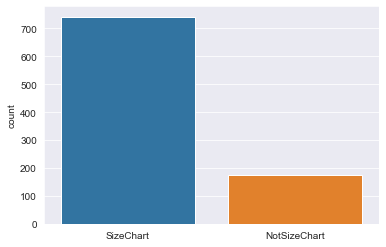

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("SizeChart")
    else:
        l.append("NotSizeChart")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'SizeChart')

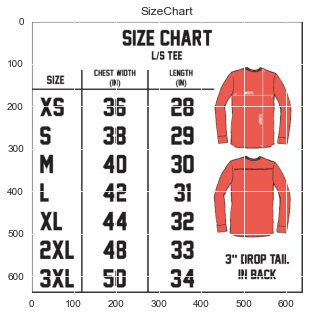

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'NotSizeChart')

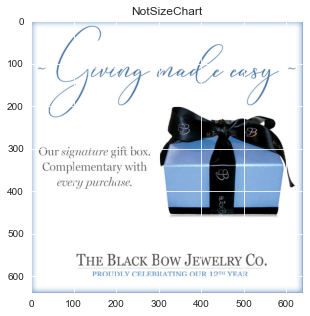

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(640,640,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Metal device set to: Apple M1


2022-10-09 23:07:46.782918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-09 23:07:46.783655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 640, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 320, 320, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 320, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 160, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 80, 80, 64)       0

In [12]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/Users/vishalkumar/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


2022-10-09 23:08:38.400502: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/vishalkumar/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-10-09 23:08:39.599316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.8092

2022-10-09 23:09:36.888149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 72s 2s/step - loss: 0.6697 - accuracy: 0.8092 - val_loss: 1.3824 - val_accuracy: 0.5895
Epoch 2/500
29/29 [==============================] - 59s 2s/step - loss: 0.6601 - accuracy: 0.8092 - val_loss: 1.9800 - val_accuracy: 0.5895
Epoch 3/500
29/29 [==============================] - 59s 2s/step - loss: 0.6576 - accuracy: 0.8092 - val_loss: 2.4422 - val_accuracy: 0.5895
Epoch 4/500
29/29 [==============================] - 56s 2s/step - loss: 0.6537 - accuracy: 0.8092 - val_loss: 2.9580 - val_accuracy: 0.5895
Epoch 5/500
29/29 [==============================] - 66s 2s/step - loss: 0.6474 - accuracy: 0.8092 - val_loss: 3.6132 - val_accuracy: 0.5895
Epoch 6/500
29/29 [==============================] - 59s 2s/step - loss: 0.6382 - accuracy: 0.8092 - val_loss: 4.3908 - val_accuracy: 0.5895
Epoch 7/500
29/29 [==============================] - 61s 2s/step - loss: 0.6260 - accuracy: 0.8092 - val_loss: 5.3132 - val_accuracy: 0.5895
Epoch 8/500
29/29 [======

29/29 [==============================] - 54s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.2252 - val_accuracy: 0.5895
Epoch 116/500
29/29 [==============================] - 55s 2s/step - loss: 0.4769 - accuracy: 0.8092 - val_loss: 20.3861 - val_accuracy: 0.5895
Epoch 117/500
29/29 [==============================] - 55s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.2653 - val_accuracy: 0.5895
Epoch 118/500
29/29 [==============================] - 55s 2s/step - loss: 0.4770 - accuracy: 0.8092 - val_loss: 20.2722 - val_accuracy: 0.5895
Epoch 119/500
29/29 [==============================] - 55s 2s/step - loss: 0.4774 - accuracy: 0.8092 - val_loss: 20.2726 - val_accuracy: 0.5895
Epoch 120/500
29/29 [==============================] - 54s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.2170 - val_accuracy: 0.5895
Epoch 121/500
29/29 [==============================] - 54s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.5196 - val_accuracy: 0.5895
Epoch 

Epoch 172/500
29/29 [==============================] - 54s 2s/step - loss: 0.4770 - accuracy: 0.8092 - val_loss: 20.2585 - val_accuracy: 0.5895
Epoch 173/500
29/29 [==============================] - 54s 2s/step - loss: 0.4775 - accuracy: 0.8092 - val_loss: 20.2550 - val_accuracy: 0.5895
Epoch 174/500
29/29 [==============================] - 54s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.4115 - val_accuracy: 0.5895
Epoch 175/500
29/29 [==============================] - 53s 2s/step - loss: 0.4770 - accuracy: 0.8092 - val_loss: 20.3484 - val_accuracy: 0.5895
Epoch 176/500
29/29 [==============================] - 53s 2s/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 20.1735 - val_accuracy: 0.5895
Epoch 177/500
29/29 [==============================] - 53s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.0492 - val_accuracy: 0.5895
Epoch 178/500
29/29 [==============================] - 55s 2s/step - loss: 0.4770 - accuracy: 0.8092 - val_loss: 20.4400 - val_accuracy:

Epoch 229/500
29/29 [==============================] - 54s 2s/step - loss: 0.4770 - accuracy: 0.8092 - val_loss: 20.2447 - val_accuracy: 0.5895
Epoch 230/500
29/29 [==============================] - 54s 2s/step - loss: 0.4774 - accuracy: 0.8092 - val_loss: 20.4318 - val_accuracy: 0.5895
Epoch 231/500
29/29 [==============================] - 53s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.3345 - val_accuracy: 0.5895
Epoch 232/500
29/29 [==============================] - 53s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.4609 - val_accuracy: 0.5895
Epoch 233/500
29/29 [==============================] - 53s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.2467 - val_accuracy: 0.5895
Epoch 234/500
29/29 [==============================] - 53s 2s/step - loss: 0.4769 - accuracy: 0.8092 - val_loss: 20.3976 - val_accuracy: 0.5895
Epoch 235/500
29/29 [==============================] - 53s 2s/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 20.2330 - val_accuracy:

Epoch 286/500
29/29 [==============================] - 54s 2s/step - loss: 0.4774 - accuracy: 0.8092 - val_loss: 20.4329 - val_accuracy: 0.5895
Epoch 287/500
29/29 [==============================] - 54s 2s/step - loss: 0.4776 - accuracy: 0.8092 - val_loss: 20.4419 - val_accuracy: 0.5895
Epoch 288/500
29/29 [==============================] - 55s 2s/step - loss: 0.4768 - accuracy: 0.8092 - val_loss: 20.2821 - val_accuracy: 0.5895
Epoch 289/500
29/29 [==============================] - 54s 2s/step - loss: 0.4774 - accuracy: 0.8092 - val_loss: 20.5967 - val_accuracy: 0.5895
Epoch 290/500
29/29 [==============================] - 55s 2s/step - loss: 0.4769 - accuracy: 0.8092 - val_loss: 20.3788 - val_accuracy: 0.5895
Epoch 291/500
29/29 [==============================] - 54s 2s/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 20.2450 - val_accuracy: 0.5895
Epoch 292/500
29/29 [==============================] - 54s 2s/step - loss: 0.4769 - accuracy: 0.8092 - val_loss: 20.2841 - val_accuracy:

Epoch 343/500
29/29 [==============================] - 55s 2s/step - loss: 0.4774 - accuracy: 0.8092 - val_loss: 20.2715 - val_accuracy: 0.5895
Epoch 344/500
29/29 [==============================] - 54s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.4004 - val_accuracy: 0.5895
Epoch 345/500
29/29 [==============================] - 54s 2s/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 20.4768 - val_accuracy: 0.5895
Epoch 346/500
29/29 [==============================] - 54s 2s/step - loss: 0.4768 - accuracy: 0.8092 - val_loss: 20.5210 - val_accuracy: 0.5895
Epoch 347/500
29/29 [==============================] - 54s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.3952 - val_accuracy: 0.5895
Epoch 348/500
29/29 [==============================] - 54s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.5046 - val_accuracy: 0.5895
Epoch 349/500
29/29 [==============================] - 54s 2s/step - loss: 0.4775 - accuracy: 0.8092 - val_loss: 20.3575 - val_accuracy:

Epoch 400/500
29/29 [==============================] - 54s 2s/step - loss: 0.4769 - accuracy: 0.8092 - val_loss: 20.5536 - val_accuracy: 0.5895
Epoch 401/500
29/29 [==============================] - 54s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.3916 - val_accuracy: 0.5895
Epoch 402/500
29/29 [==============================] - 54s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.8742 - val_accuracy: 0.5895
Epoch 403/500
29/29 [==============================] - 55s 2s/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 20.7141 - val_accuracy: 0.5895
Epoch 404/500
29/29 [==============================] - 56s 2s/step - loss: 0.4768 - accuracy: 0.8092 - val_loss: 20.4291 - val_accuracy: 0.5895
Epoch 405/500
29/29 [==============================] - 54s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.6109 - val_accuracy: 0.5895
Epoch 406/500
29/29 [==============================] - 55s 2s/step - loss: 0.4772 - accuracy: 0.8092 - val_loss: 20.7178 - val_accuracy:

Epoch 457/500
29/29 [==============================] - 54s 2s/step - loss: 0.4774 - accuracy: 0.8092 - val_loss: 20.4821 - val_accuracy: 0.5895
Epoch 458/500
29/29 [==============================] - 55s 2s/step - loss: 0.4777 - accuracy: 0.8092 - val_loss: 20.6761 - val_accuracy: 0.5895
Epoch 459/500
29/29 [==============================] - 55s 2s/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 20.2881 - val_accuracy: 0.5895
Epoch 460/500
29/29 [==============================] - 55s 2s/step - loss: 0.4771 - accuracy: 0.8092 - val_loss: 20.4852 - val_accuracy: 0.5895
Epoch 461/500
29/29 [==============================] - 54s 2s/step - loss: 0.4770 - accuracy: 0.8092 - val_loss: 20.8306 - val_accuracy: 0.5895
Epoch 462/500
29/29 [==============================] - 54s 2s/step - loss: 0.4767 - accuracy: 0.8092 - val_loss: 20.6167 - val_accuracy: 0.5895
Epoch 463/500
29/29 [==============================] - 54s 2s/step - loss: 0.4768 - accuracy: 0.8092 - val_loss: 20.6388 - val_accuracy:

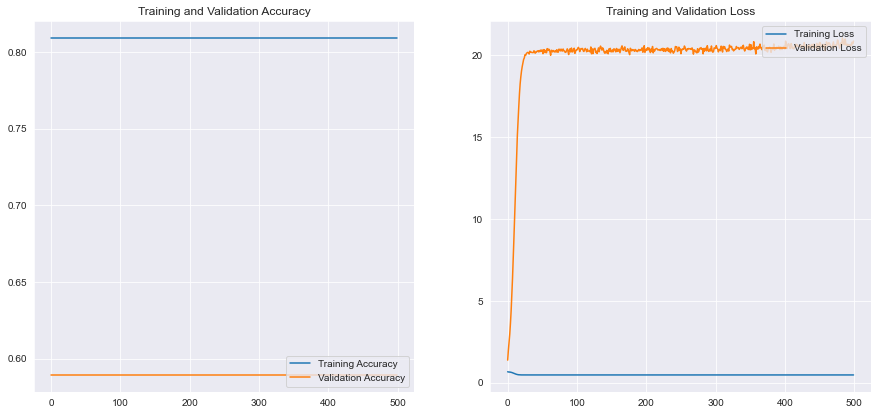

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['SizeChart (Class 0)','NotSizeChart (Class 1)']))

AttributeError: 'Sequential' object has no attribute 'predict_classes'